# Sources Élémentaires
Avec ce TP numérique, nous allons nous familiariser à plusieurs écoulements de bases qui nous serviront à construire la théorie des profils portants.

## Objectifs de la séance
Comprendre le lien entre les formules mathématiques et la structure des écoulements.


### Modules python et paramètres pour les graphiques

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12

### Exercice 1 - Rappels théoriques
1. Listez les hypothèses nécessaires pour pouvoir définir un potentiel de vitesse $\varphi$ et une fonction de courant $\psi$ pour décrire le champ de vitesse.
2. Donnez les équations qui relient champ potentiel, fonction courant et composantes de vitesse en cartésien.

### Exercice 2 - Écoulement uniforme
On considère un écoulement uniforme tel que $\vec{V}=V_\infty \vec{e}_x$
1. Déterminez les fonctions $\varphi(x,y)$ et $\psi(x,y)$ qui décrivent cet écoulement

\begin{align}
\varphi &= V_\infty x\\
\psi &= V_\infty y
\end{align}

2. Construisez les lignes iso-potentielles et iso-courant à l'aide de la fonction `contour` de `matplotlib`

In [3]:
nx = 200
ny = 250
x = np.linspace(-10,10,nx)
y = np.linspace(-10,10,ny)
X,Y = np.meshgrid(x,y)

In [4]:
X.shape

(250, 200)

In [5]:
Vinf = 2.0
PHI = Vinf * X
PSI = Vinf * Y

In [6]:
Ncontours = 25

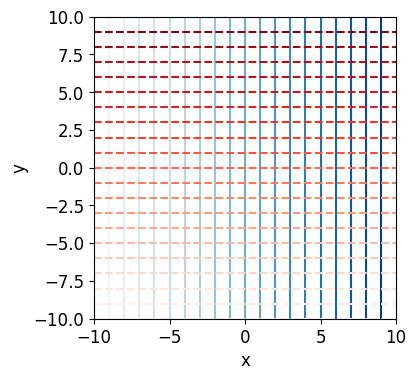

In [7]:
plt.contour(X,Y,PHI,Ncontours,cmap=plt.cm.Blues)
plt.contour(X,Y,PSI,Ncontours,linestyles='dashed',cmap=plt.cm.Reds)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('image')
plt.show()

3. Tracez les lignes de courant avec la fonction `streamplot` de `matplotlib`

In [8]:
U = Vinf * np.ones_like(X)
V = np.zeros_like(X)

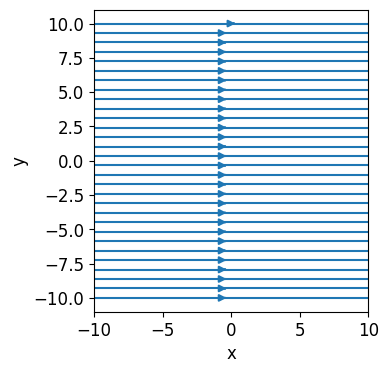

In [9]:
plt.streamplot(X,Y,U,V)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('image')
plt.show()

4. L'écoulement uniforme a maintenant une incidence $\alpha$ par rapport à la direction $\vec{e}_x$. Retrouvez les nouvelles équations de $\varphi$ et $\psi$, et tracez les lignes de courants et potentielles.

\begin{align}
u &= V_\infty \cos{\alpha}\\
v &= V_\infty \sin{\alpha}\\
\end{align}
par intégration :
\begin{align}
\varphi &= V_\infty \cos{(\alpha)} \, x + V_\infty \sin{(\alpha)} \, y \\
\psi &= - V_\infty \sin{(\alpha)} \, x + V_\infty \cos{(\alpha)} \, y
\end{align}

In [10]:
Vinf = 2.0
alpha = np.deg2rad(5)
PHI = Vinf * (np.cos(alpha) * X + np.sin(alpha) * Y)
PSI = Vinf * (np.sin(alpha) * X - np.cos(alpha) * Y)

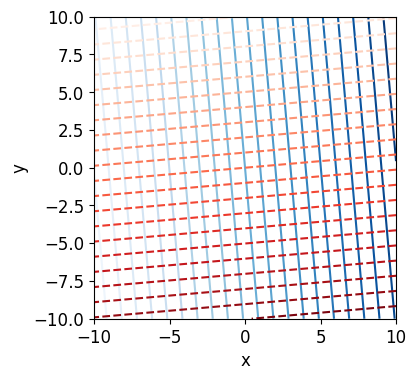

In [11]:
plt.contour(X,Y,PHI,Ncontours,cmap=plt.cm.Blues)
plt.contour(X,Y,PSI,Ncontours,linestyles='dashed',cmap=plt.cm.Reds)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('image')
plt.show()

In [15]:
U = Vinf * np.cos(alpha) * np.ones_like(X)
V = Vinf * np.sin(alpha) * np.ones_like(X)

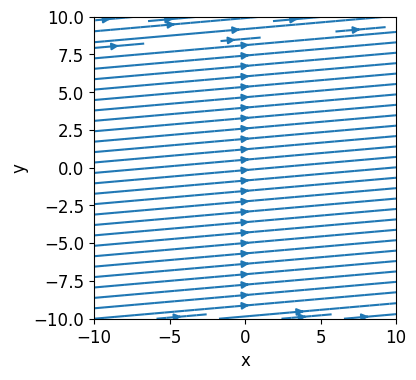

In [16]:
plt.streamplot(X,Y,U,V)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('image')
plt.show()

### Exercice 3 - Source et puits
On considère un écoulement de source d'intensité $\Lambda$ tel que les composantes cartésiennes du champs de vitesse s'écrivent :
\begin{align}
u = \frac{\Lambda}{2\pi}\frac{x}{x^2+y^2}\\
v = \frac{\Lambda}{2\pi}\frac{y}{x^2+y^2}
\end{align}
1. Déterminez les composantes radiale et tangentielle de cet écoulement

\begin{align}
u_r &= \frac{\Lambda}{2\pi \, r} &=& \frac{\partial \varphi}{\partial r} &=& -\frac{1}{r}\frac{\partial \psi}{\partial \theta}\\
u_\theta &= 0 &=&\frac{1}{r}\frac{\partial \varphi}{\partial \theta} &=& \frac{\partial \psi}{\partial r}
\end{align}
d'où
\begin{align}
\varphi &= \frac{\Lambda}{2\pi} \ln{r} \\
\psi &= \frac{\Lambda}{2\pi} \theta
\end{align}

2. Tracez les lignes de courant et potentielle

In [18]:
nx = 200
ny = 250
x = np.linspace(-10,10,nx)
y = np.linspace(-10,10,ny)
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2)
THETA = np.arctan2(X,Y)

In [25]:
L = -1.0
PHI = L/(2*np.pi) * np.log(R)
PSI = L/(2*np.pi) * THETA

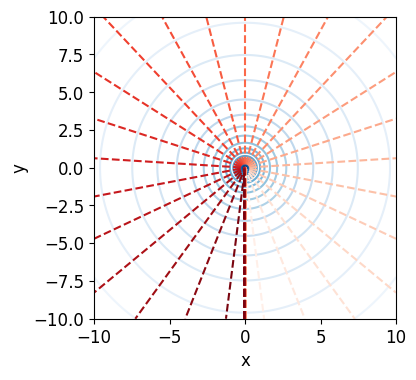

In [26]:
plt.contour(X,Y,PHI,Ncontours,cmap=plt.cm.Blues)
plt.contour(X,Y,PSI,Ncontours,linestyles='dashed',cmap=plt.cm.Reds)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('image')
plt.show()

In [27]:
U = L/(2*np.pi) * X / R**2
V = L/(2*np.pi) * Y / R**2

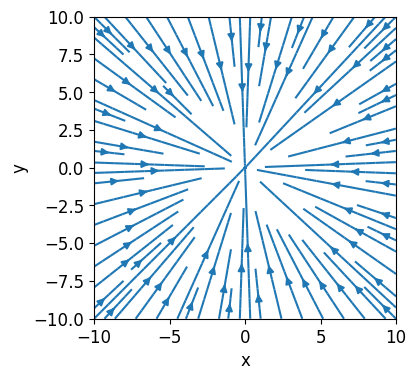

In [28]:
plt.streamplot(X,Y,U,V)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('image')
plt.show()

### Exercice 4 - Écoulement uniforme et source
Superposez l'écoulement uniforme et la source.

In [38]:
nx = 200
ny = 250
Vinf = 1.0
alpha = np.deg2rad(7)
L = 10.0
x = np.linspace(-10,10,nx)
y = np.linspace(-10,10,ny)
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2)
THETA = np.arctan2(X,Y)

In [39]:
U = Vinf*np.cos(alpha) + L/(2*np.pi) * X / R**2
V = Vinf*np.sin(alpha) + L/(2*np.pi) * Y / R**2

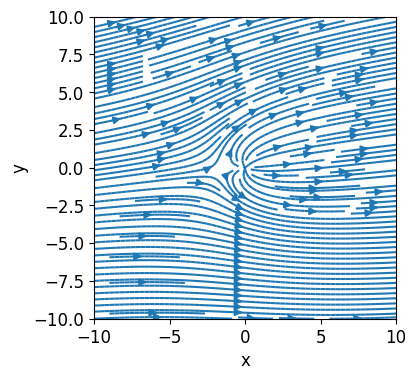

In [43]:
plt.streamplot(X,Y,U,V,density=[2,2])
plt.xlabel('x')
plt.ylabel('y')
plt.axis('image')
plt.show()